Training Step: 1914  | total loss: 0.51681 | time: 79.510s
| Adam | epoch: 005 | loss: 0.51681 - acc: 0.7361 -- iter: 24448/24500
Training Step: 1915  | total loss: 0.51295 | time: 80.709s
| Adam | epoch: 005 | loss: 0.51295 - acc: 0.7391 | val_loss: 0.39082 - val_acc: 0.8780 -- iter: 24500/24500
--
INFO:tensorflow:C:\Users\Ajay Kumar Singh\Documents\Cloudmax\Python\Image Classififer\dogsvscats-0.001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


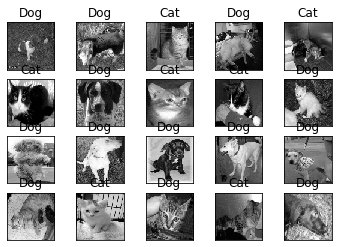

In [9]:

# Python program to create 
# Image Classifier using CNN 
  
# Importing the required libraries 
import cv2 
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm 

TRAIN_DIR = 'dogs-vs-cats/train/train'
TEST_DIR = 'dogs-vs-cats/test1/test1'
IMG_SIZE = 80
LR = 1e-3
  
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '6conv-basic') 
  
def label_img(img): 
    word_label = img.split('.')[0] 
    # DIY One hot encoder 
    if word_label == 'cat': return [1, 0] 
    elif word_label == 'dog': return [0, 1] 

def create_train_data(): 
    # Creating an empty list where we should the store the training data 
    # after a little preprocessing of the data 
    training_data = [] 
  
    # tqdm is only used for interactive loading 
    # loading the training data 
    for img in tqdm(os.listdir(TRAIN_DIR)): 
  
        # labeling the images 
        label = label_img(img) 
  
        path = os.path.join(TRAIN_DIR, img) 
  
        # loading the image from the path and then converting them into 
        # greyscale for easier covnet prob 
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
  
        # resizing the image for processing them in the covnet 
        img = cv2.resize(img, dsize=(80,80)) 
  
        # final step-forming the training data list with numpy array of the images 
        training_data.append([np.array(img), np.array(label)]) 

  
    # saving our trained data for further uses if required 
    np.save('train_data.npy', training_data) 
    return training_data 
  
def process_test_data(): 
    testing_data = [] 
    for img in tqdm(os.listdir(TEST_DIR)): 
        path = os.path.join(TEST_DIR, img) 
        img_num = img.split('.')[0] 
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, dsize=(80,80)) 
        testing_data.append([np.array(img), img_num]) 
          
    shuffle(testing_data) 
    np.save('test_data.npy', testing_data) 
    return testing_data 
  
train_data = create_train_data() 
test_data = process_test_data() 

# Neural network
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d 
from tflearn.layers.core import input_data, dropout, fully_connected 
from tflearn.layers.estimator import regression 
  
import tensorflow as tf 
tf.reset_default_graph() 
convnet = input_data(shape =[None, IMG_SIZE, IMG_SIZE, 1], name ='input') 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 128, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 64, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = conv_2d(convnet, 32, 5, activation ='relu') 
convnet = max_pool_2d(convnet, 5) 
  
convnet = fully_connected(convnet, 1024, activation ='relu') 
convnet = dropout(convnet, 0.8) 
  
convnet = fully_connected(convnet, 2, activation ='softmax') 
convnet = regression(convnet, optimizer ='adam', learning_rate = LR, 
      loss ='categorical_crossentropy', name ='targets') 
  
model = tflearn.DNN(convnet, tensorboard_dir ='log') 
  
# Splitting the testing data and training data 
train = train_data[:-500] 
test = train_data[-500:] 
  
'''Setting up the features and lables'''
# X-Features & Y-Labels 
  
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 
test_y = [i[1] for i in test] 
  
'''Fitting the data into our model'''
# epoch = 5 taken 
model.fit({'input': X}, {'targets': Y}, n_epoch = 5,  
    validation_set =({'input': test_x}, {'targets': test_y}),  
    snapshot_step = 500, show_metric = True, run_id = MODEL_NAME) 
model.save(MODEL_NAME) 
  
'''Testing the data'''
import matplotlib.pyplot as plt 
# if you need to create the data: 
# test_data = process_test_data() 
# if you already have some saved: 
test_data = np.load('test_data.npy') 
  
fig = plt.figure() 
  
for num, data in enumerate(test_data[:20]): 
    # cat: [1, 0] 
    # dog: [0, 1] 
      
    img_num = data[1] 
    img_data = data[0] 
      
    y = fig.add_subplot(4, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1) 
  
    # model_out = model.predict([data])[0] 
    model_out = model.predict([data])[0] 
      
    if np.argmax(model_out) == 1: str_label ='Dog'
    else: str_label ='Cat'
          
    y.imshow(orig, cmap ='gray') 
    plt.title(str_label) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
plt.show() 

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:12<00:00, 966.39it/s]


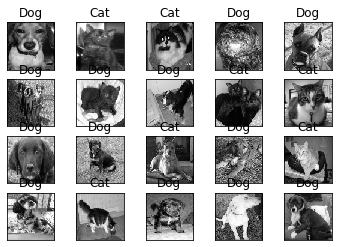

In [14]:
'''Testing the data'''
import matplotlib.pyplot as plt 
# if you need to create the data: 
test_data = process_test_data() 
# if you already have some saved: 
test_data = np.load('test_data.npy') 

fig = plt.figure() 
  
for num, data in enumerate(test_data[:20]): 
    # cat: [1, 0] 
    # dog: [0, 1] 
      
    img_num = data[1] 
    img_data = data[0] 
      
    y = fig.add_subplot(4, 5, num + 1) 
    orig = img_data 
    data = img_data.reshape(80, 80, 1) 
  
    # model_out = model.predict([data])[0] 
    model_out = model.predict([data])[0] 
      
    if np.argmax(model_out) == 1: str_label ='Dog'
    else: str_label ='Cat'
          
    y.imshow(orig, cmap ='gray') 
    plt.title(str_label) 
    y.axes.get_xaxis().set_visible(False) 
    y.axes.get_yaxis().set_visible(False) 
plt.show()